### Importing Libraries

In [1]:
import os

In [ ]:
import pandas as pd
import numpy as np
import regex as re

### Interactivity to all cells

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [4]:
anime_df = pd.read_csv("anime.csv")
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
anime_df.tail()

,anime_id,name,genre,type,episodes,rating,members
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


In [6]:
anime_df.shape

(12294, 7)

In [7]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


#### 1.Episodes is not supposed to be an object (string). We'll remove the episodes column later on, as it doesn't help in the prediction of recommended anime.
#### 2.We can notice some special characters in the 'name' column
#### First let's clean the data in 'name' column

In [8]:
def cleandata(string):
    namedata = re.sub(r"[^\sa-zA-Z0-9\.\:\;\!\-]","",str(string))
    return namedata

In [9]:
anime_df.name = anime_df.name.apply(cleandata)

In [10]:
anime_df.head(10)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter 2011,"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


### Sorting the dataset based on 'rating'

In [11]:
anime_df = anime_df.sort_values('rating', ascending=False)
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
10400,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,Unknown,9.60,47
9595,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
9078,33607,Kahei no Umi,Historical,Movie,1,9.33,44


#### Notice a few ratings which are high, but very few members voted on them. Let's remove this discrepency by applying a limit on the minimum number of 'members' (500)

In [12]:
anime_df_filtered =  anime_df[anime_df['members']>=500]

In [13]:
anime_df_filtered.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [14]:
anime_df_filtered.tail()

,anime_id,name,genre,type,episodes,rating,members
11110,34284,Yuuki Yuuna wa Yuusha de Aru: Washio Sumi no Shou,"Drama, Fantasy, Magic, Slice of Life",TV,6,NaN,2593
11111,34445,Yuuki Yuuna wa Yuusha de Aru: Yuusha no Shou,"Drama, Fantasy, Magic, Slice of Life",TV,6,NaN,4439
11112,33035,Yuyushiki Special,NaN,Special,1,NaN,2294
12252,34382,Citrus,"Drama, Romance, School, Yuri",NaN,Unknown,NaN,2459
12259,33654,Hitorijime My Hero,Yaoi,NaN,Unknown,NaN,1574


#### Let's drop the 'episodes' column

In [15]:
anime_df_filtered = anime_df_filtered.drop(columns=['episodes'])

In [16]:
anime_df_filtered = anime_df_filtered.dropna(axis=0) 
anime_df_filtered
anime_df_filtered.shape
anime_df_filtered.info()

,anime_id,name,genre,type,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,9.26,793665
2,28977,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,9.17,673572
4,9969,Gintama039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.16,151266
...,...,...,...,...,...,...
8055,29949,Nami,Dementia,Movie,2.67,1817
8054,31634,Kokuhaku,Horror,ONA,2.67,816
8056,413,Hametsu no Mars,"Horror, Sci-Fi",OVA,2.37,27557
8057,13405,Utsu Musume Sayuri,"Comedy, Dementia",OVA,2.14,4047


(7854, 6)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7854 entries, 0 to 8058
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  7854 non-null   int64  
 1   name      7854 non-null   object 
 2   genre     7854 non-null   object 
 3   type      7854 non-null   object 
 4   rating    7854 non-null   float64
 5   members   7854 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 429.5+ KB


### Let's take a look at the 'ratings.csv' file

In [17]:
ratings = pd.read_csv('rating.csv')
ratings.head()


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


### Remove all ratings which are '-1' and sort them by 'anime_id'

In [18]:
ratings_df = ratings[ratings.rating != -1]
ratings_df = ratings_df.sort_values('anime_id')
ratings_df

,user_id,anime_id,rating
6031856,56600,1,9
7282728,67866,1,9
3614656,33632,1,10
2785137,26166,1,8
301474,3115,1,8
...,...,...,...
6751597,62402,34367,4
6452110,59643,34367,5
1456909,13954,34475,6
7535009,70547,34475,9


### Reset the index and drop the 'user_id' column

In [19]:
ratings_df = ratings_df.reset_index()
ratings_df = ratings_df.drop(columns=['index','user_id'])
ratings_df

,anime_id,rating
0,1,9
1,1,9
2,1,10
3,1,8
4,1,8
...,...,...
6337236,34367,4
6337237,34367,5
6337238,34475,6
6337239,34475,9


In [20]:
ratings_df['anime_id'].nunique()

9927

### The count of users voting to a particular anime

In [21]:
ratings_df.groupby('anime_id').anime_id.count().rename("ratings_count").to_frame()

,ratings_count
anime_id,
1,13449
5,5790
6,9385
7,2169
8,308
...,...
34324,11
34325,15
34349,3


### Let's find the average rating of each anime

In [22]:
ratings_filtered = ratings_df.groupby(['anime_id'],as_index= False).mean()
ratings_filtered = ratings_filtered.rename(columns={'rating':'avg_rating'})
ratings_filtered

,anime_id,avg_rating
0,1,8.869433
1,5,8.439724
2,6,8.419393
3,7,7.533426
4,8,7.198052
...,...,...
9922,34324,5.909091
9923,34325,7.333333
9924,34349,7.000000
9925,34367,5.250000


### Merge both the datasets 'anime_df_filtered' and 'ratings_filtered' into 'merged_df' based on the similar column 'anime_id'

In [24]:
merged_df = anime_df_filtered.merge(ratings_filtered, on='anime_id')
merged_df.head()

,anime_id,name,genre,type,rating,members,avg_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.37,200630,9.426313
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,9.26,793665,9.322741
2,28977,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.25,114262,9.449495
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,9.17,673572,9.261326
4,9969,Gintama039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.16,151266,9.272552


### Visualize the best animes based on average rating of each anime

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 720x360 with 0 Axes>

(1.0, 10.0)

Text(0.5, 1.0, 'Best animes by average ratings')

Text(0.5, 0, 'Average Scores')

Text(0, 0.5, 'Anime Name')

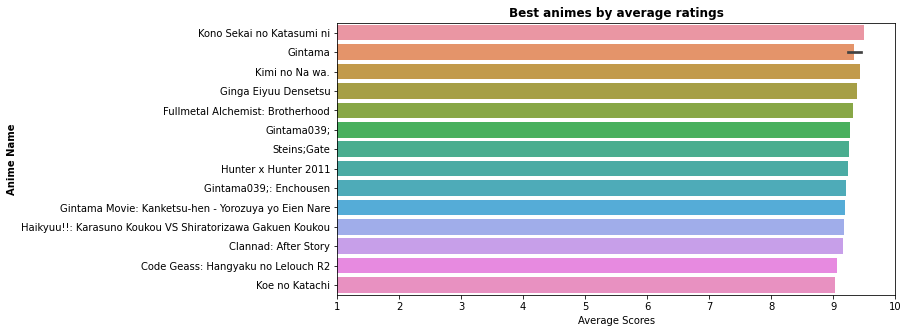

In [28]:
average_rating= merged_df.sort_values('avg_rating', ascending=False)
plt.figure(figsize=(10,5))
axis1 = sns.barplot(x= average_rating['avg_rating'].head(15), y =average_rating['name'].head(15),data=average_rating)
plt.xlim(1,10)
plt.title('Best animes by average ratings', weight='bold')
plt.xlabel('Average Scores')
plt.ylabel('Anime Name', weight='bold')

### Visualize the most popular anime based on 'members' 

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Most famous among otaku')

Text(0.5, 0, 'Number of members in anime community')

Text(0, 0.5, 'Anime Name')

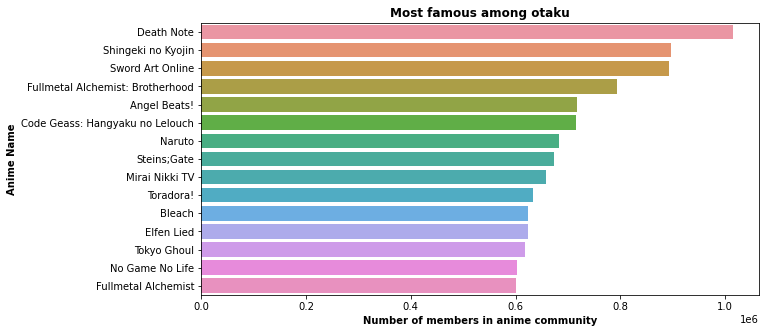

In [30]:
most_famous = merged_df.sort_values('members', ascending=False)
plt.figure(figsize=(10,5))
axis2 = sns.barplot(x= most_famous['members'].head(15), y=most_famous['name'].head(15), data=most_famous)
plt.title('Most famous among otaku',weight = 'bold')
plt.xlabel('Number of members in anime community', weight= 'bold')
plt.ylabel('Anime Name', weight='bold')


### Combining and normalizing - normalising the dataset to give a predicted score for each anime

#### using the MinMaxScaler from scikit-learn's preprocessing module to normalize 'avg_rating' and 'members'

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
scaled_df = scaling.fit_transform(merged_df[['avg_rating','members']])
normalised_df = pd.DataFrame(scaled_df,columns=['avg_rating','members'])
normalised_df.head()


,avg_rating,members
0,0.990853,0.197480
1,0.977995,0.782664
2,0.993730,0.112256
3,0.970371,0.664161
4,0.971765,0.148770


#### adding the normalised data into 'merged_df'

In [33]:
merged_df[['normalised_rating','normalised_members']]= normalised_df
merged_df.head()

,anime_id,name,genre,type,rating,members,avg_rating,normalised_rating,normalised_members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.37,200630,9.426313,0.990853,0.197480
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,9.26,793665,9.322741,0.977995,0.782664
2,28977,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.25,114262,9.449495,0.993730,0.112256
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,9.17,673572,9.261326,0.970371,0.664161
4,9969,Gintama039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.16,151266,9.272552,0.971765,0.148770


### Giving a total score to each anime based on normalised rating and normalised popularity. 
#### Showing the top 15 anime with top scores

In [35]:
merged_df['score'] = merged_df['normalised_rating']*0.5 + merged_df['normalised_members']*0.5
merged_df = merged_df.sort_values(['score'],ascending=False)
merged_df[['name','normalised_rating','normalised_members','score']].head(15)

,name,normalised_rating,normalised_members,score
38,Death Note,0.917402,1.000000,0.958701
81,Shingeki no Kyojin,0.903885,0.883870,0.893878
1,Fullmetal Alchemist: Brotherhood,0.977995,0.782664,0.880330
780,Sword Art Online,0.831199,0.880783,0.855991
3,Steins;Gate,0.970371,0.664161,0.817266
21,Code Geass: Hangyaku no Lelouch,0.928968,0.705189,0.817079
156,Angel Beats!,0.882033,0.707799,0.794916
122,Toradora!,0.887881,0.624932,0.756407
13,Code Geass: Hangyaku no Lelouch R2,0.945359,0.564810,0.755085
438,Mirai Nikki TV,0.848341,0.647996,0.748168


<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Best rated and Most popular Anime list')

Text(0.5, 0, 'Score')

Text(0, 0.5, 'Name')

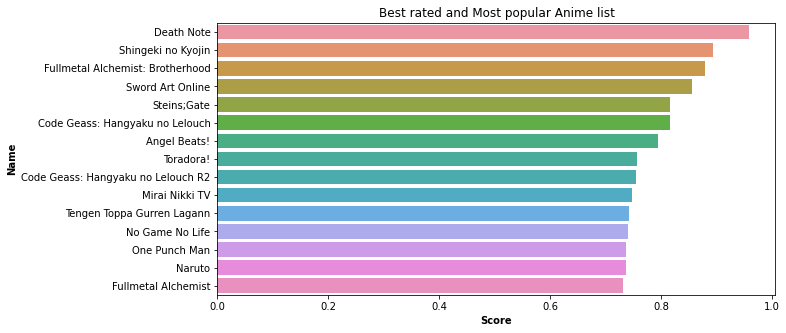

In [36]:
scored_df = merged_df.sort_values('score', ascending=False)
plt.figure(figsize=(10,5))

axis3 = sns.barplot(x=scored_df['score'].head(15), y=scored_df['name'].head(15),data=scored_df)
plt.title('Best rated and Most popular Anime list')
plt.xlabel('Score', weight='bold')
plt.ylabel('Name', weight='bold')